## Wide&Deep模型的多输入

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.5.0
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
matplotlib 3.4.2
numpy 1.19.5
pandas 1.3.0
sklearn 0.24.2
tensorflow 2.5.0
tensorflow.keras 2.5.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# 多输入 
intput_wide = keras.layers.Input(shape=[5])
intput_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30,activation='relu')(intput_deep)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([intput_wide,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[intput_wide, intput_deep],
                           outputs=[output])

model.summary()
model.compile(loss="mean_squared_error", optimizer="adam")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

2021-07-26 17:55:59.342540: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [7]:
x_train_scaled_wide = x_train_scaled[:,:5]
x_train_scaled_deep = x_train_scaled[:,2:]
x_valid_scaled_wide = x_valid_scaled[:,:5]
x_valid_scaled_deep = x_valid_scaled[:,2:]
x_test_scaled_wide = x_test_scaled[:,:5]
x_test_scaled_deep = x_test_scaled[:,2:]
history = model.fit([x_train_scaled_wide, x_train_scaled_deep], y_train,
                    validation_data = ([x_valid_scaled_wide,
                                       x_valid_scaled_deep], y_valid),
                    epochs = 10,
                    callbacks = callbacks)

2021-07-26 17:56:39.387814: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7970 - val_loss: 0.8980
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6613 - val_loss: 0.5988
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5228 - val_loss: 0.5029
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4636 - val_loss: 0.4741
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4185 - val_loss: 0.4209
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3968 - val_loss: 0.4013
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3796 - val_loss: 0.3837
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3697 - val_loss: 0.3672
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3511 - val_loss: 0.3582
Epoch 10/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3473 - val_loss: 0.3544

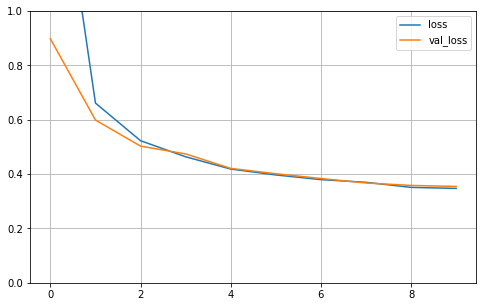

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [9]:
model.evaluate([x_test_scaled_wide,x_test_scaled_deep], y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3562


0.356222003698349